In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv("../data/cleaned_movies_NEW.csv")

In [3]:
df.drop_duplicates(keep='first', inplace=True)

y = df['revenue_adjusted']
X = df[['budget','runtime',
           'jan_release','feb_release','mar_release','apr_release','may_release',
           'jun_release','jul_release','aug_release','sep_release','oct_release',
           'nov_release','dec_release','sun_release','mon_release','tue_release',
           'wed_release','thur_release','fri_release','sat_release',
           'genre_Horror', 'genre_War',
           'genre_Adventure', 'genre_Western', 'genre_Comedy', 'genre_Mystery',
           'genre_Romance', 'genre_Science_Fiction', 'genre_Action',
           'genre_Thriller', 'genre_Crime', 'genre_TV_Movie', 'genre_Animation',
           'genre_Foreign', 'genre_Fantasy', 'genre_Drama', 'genre_Documentary',
           'genre_Family', 'genre_Music', 'genre_History','cast_size','holiday_release', 'cast_1_vote_average',
           'cast_2_vote_average','cast_3_vote_average','cast_4_vote_average','cast_5_vote_average',
           'keywords_holiday_celebrate', 'keywords_violence_war_crime',
           'keywords_superhero', 'keywords_creditstinger_3d',
           'keywords_womandirector_independentfilm',
           'keywords_future_robots_aliens',
           'keywords_edgy_alcohol_drug_sex_nudity', 'keywords_music',
           'keywords_animal_nature']]

X = X.fillna(0)

cols = X.columns

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.80, test_size=0.20, random_state=56)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [4]:
rmse_val = [] # store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 254996547.62818062
RMSE value for k=  2 is: 229751497.5722375
RMSE value for k=  3 is: 223243301.77471066
RMSE value for k=  4 is: 217885035.98519972
RMSE value for k=  5 is: 218978307.35595167
RMSE value for k=  6 is: 222580621.00692263
RMSE value for k=  7 is: 222453507.3105087
RMSE value for k=  8 is: 222883114.2911246
RMSE value for k=  9 is: 222871544.4864389
RMSE value for k=  10 is: 220315976.77555093
RMSE value for k=  11 is: 221483153.9760391
RMSE value for k=  12 is: 221107982.19383985
RMSE value for k=  13 is: 221146017.0105364
RMSE value for k=  14 is: 220934320.5739297
RMSE value for k=  15 is: 220173234.4776485
RMSE value for k=  16 is: 219563890.50081488
RMSE value for k=  17 is: 220350776.95851815
RMSE value for k=  18 is: 220817900.16522783
RMSE value for k=  19 is: 221584236.1025372
RMSE value for k=  20 is: 220343689.1402282


<Axes: >

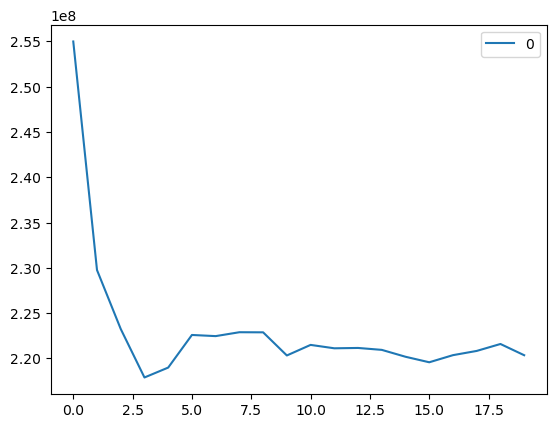

In [21]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()  # optimal k value is 4

In [22]:
# train model with the optimal k value 
model = neighbors.KNeighborsRegressor(n_neighbors = 4)

model.fit(X_train, y_train)  #fit the model
predict_test = model.predict(X_test) #make prediction on test set
predict_train = model.predict(X_train) #make prediction on train set

In [23]:
model.score(X_test,y_test)

0.40521510107160175

In [24]:
mae_test = mean_absolute_error(y_test, predict_test)
mse_test = mean_squared_error(y_test, predict_test)
rmse_test = np.sqrt(mse_test)

In [25]:
mae_test

124693054.56864339

In [26]:
mse_test

4.747388890627178e+16

In [27]:
rmse_test

217885035.98519972

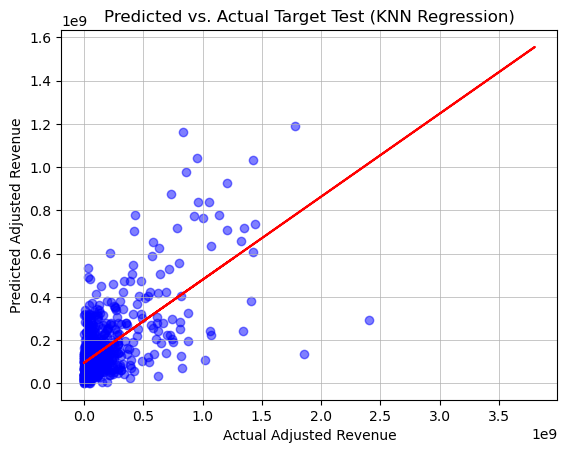

In [22]:
plt.scatter(y_test, predict_test, alpha=0.5, color='blue')

m, b = np.polyfit(y_test, predict_test, 1)

plt.plot(y_train, m*y_train + b, color='red')

plt.xlabel('Actual Adjusted Revenue')
plt.ylabel('Predicted Adjusted Revenue')
plt.title('Predicted vs. Actual Target Test (KNN Regression)')
plt.grid(linewidth=0.5)

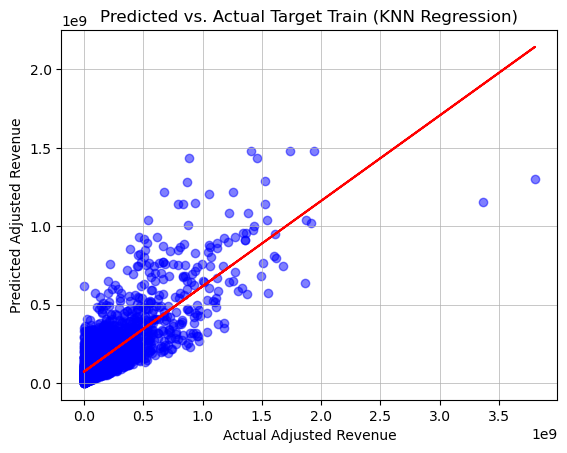

In [23]:
plt.scatter(y_train, predict_train, alpha=0.5, color='blue')

m, b = np.polyfit(y_train, predict_train, 1)

plt.plot(y_train, m*y_train + b, color='red')

plt.xlabel('Actual Adjusted Revenue')
plt.ylabel('Predicted Adjusted Revenue')
plt.title('Predicted vs. Actual Target Train (KNN Regression)')
plt.grid(linewidth=0.5)